In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from tqdm import tqdm
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from lat_cb.signal import *
from lat_cb.spectra import *
from lat_cb.mle import *

In [3]:
libdir ='/pscratch/sd/l/lonappan/SOLAT'
nside = 512
alpha = 0.35
dust = 1
synch = 1
beta = [0.1,0.1,0.2,0.2,.2,.2]
lmax = 1000
lat = Spectra(libdir,nside,alpha,dust,synch,beta,lmax)

In [4]:
lat.compute(0)

sync x obs spectra: 100%|██████████| 6/6 [00:00<00:00, 215.18band/s]


In [5]:
ml = MLE(libdir,nside,alpha,dust,synch,beta,lmax)

In [6]:
beta,alpha_27,alpha_39,alpha_93,alpha_145,alpha_225,alpha_280 = [],[],[],[],[],[],[]

In [7]:
for i in tqdm(range(100)):
    d = ml.estimate_angle(i)
    beta.append(d['beta'])
    alpha_27.append(d['alpha_27'])
    alpha_39.append(d['alpha_39'])
    alpha_93.append(d['alpha_93'])
    alpha_145.append(d['alpha_145'])
    alpha_225.append(d['alpha_225'])
    alpha_280.append(d['alpha_280'])

100%|██████████| 100/100 [02:51<00:00,  1.72s/it]


Text(0.5, 0, '$\\beta$')

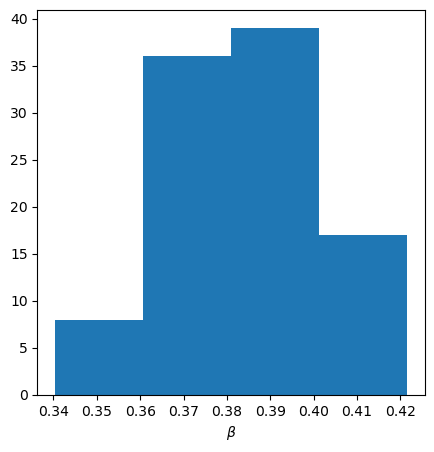

In [8]:
plt.figure(figsize=(5,5))
n = plt.hist(beta,bins=4)
plt.xlabel(r'$\beta$')

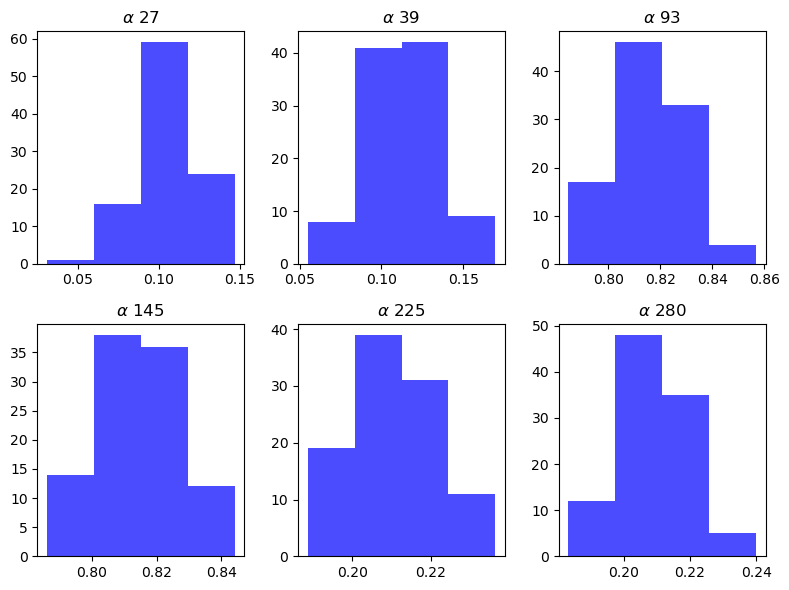

In [9]:
data = [alpha_27,alpha_39,alpha_93,alpha_145,alpha_225,alpha_280]
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

for i, ax in enumerate(axs.flat):
    ax.hist(data[i], bins=4, color='blue', alpha=0.7)
    ax.set_title(f'$\\alpha$ {ml.bands[i]}')

plt.tight_layout()


In [79]:
ang,cov,std = ml.calculate(3)

Iter: 0 Convergence: [27.85729076 27.65577828 71.9811915  71.23068014 34.61569817 34.213337  ]
Iter: 1 Convergence: [27.7101783  27.57393309 71.9739095  71.2030187  34.50360213 34.08911167]
Iter: 2 Convergence: [0.15133123 0.08487068 0.00662523 0.02692294 0.1100543  0.12212835]
Iter: 3 Convergence: [0.00451986 0.003124   0.00067896 0.000761   0.00211608 0.00219782]
Iter: 4 Convergence: [3.22968321e-04 9.18440324e-05 2.35546435e-05 2.16070745e-05
 7.17507334e-05 1.02523517e-04]
Iter: 5 Convergence: [2.43449854e-05 8.46614379e-06 1.51192998e-06 1.18523979e-06
 3.48375382e-06 1.45916290e-06]


In [80]:
np.rad2deg(ang[-1])

array([58.32520927, 57.33057651, 57.07565612,  0.35965473,  0.10210583,
        0.09985889,  0.83992177,  0.82707491,  0.21544051,  0.20853378])

In [81]:
np.rad2deg(std[-1])

array([0.65850296, 0.27777779, 0.56364081, 0.01930241, 0.0193968 ,
       0.01937476, 0.01606815, 0.01488171, 0.01159856, 0.01174333])